In [1]:
import os
import pandas as pd
from sklearn.feature_extraction import stop_words
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [2]:
# easier to see full title with a bigger maxwidth:
pd.options.display.max_colwidth = 200

list_of_dfs = []

try: 
    print('Lets try and pull data from the files in this folder')
    for file in os.listdir('../data')[1:]:
        d = pd.read_csv('../data/' + file)
        list_of_dfs.append(d)
    print('Huzzah! Mission Complete')
except:
    print("Welp, that didn't work")

df = pd.concat(list_of_dfs, ignore_index=True).drop_duplicates(subset = 'title')

Lets try and pull data from the files in this folder
Huzzah! Mission Complete


C:\Users\kwama\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  from ipykernel import kernelapp as app


In [3]:
df.shape

(2974, 104)

In [4]:
df.columns

Index(['all_awardings', 'allow_live_comments', 'approved_at_utc',
       'approved_by', 'archived', 'author', 'author_cakeday',
       'author_flair_background_color', 'author_flair_css_class',
       'author_flair_richtext',
       ...
       'thumbnail_width', 'title', 'total_awards_received', 'ups', 'url',
       'user_reports', 'view_count', 'visited', 'whitelist_status', 'wls'],
      dtype='object', length=104)

In [5]:
df.head()

,all_awardings,allow_live_comments,approved_at_utc,approved_by,archived,author,author_cakeday,author_flair_background_color,author_flair_css_class,author_flair_richtext,...,thumbnail_width,title,total_awards_received,ups,url,user_reports,view_count,visited,whitelist_status,wls
0,[],False,NaN,NaN,False,pittman66,NaN,NaN,MAL,[],...,NaN,"Wiki Overhaul Month, Week 2: Watch Order Wiki",0,67,https://www.reddit.com/r/anime/comments/c822ra/wiki_overhaul_month_week_2_watch_order_wiki/,[],NaN,False,all_ads,6
1,[],False,NaN,NaN,False,AnimeMod,NaN,NaN,NaN,[],...,NaN,"Recommendation Tuesdays Megathread - Week of July 02, 2019",0,61,https://www.reddit.com/r/anime/comments/c823rj/recommendation_tuesdays_megathread_week_of_july/,[],NaN,False,all_ads,6
2,[],True,NaN,NaN,False,MinecrafterPH,NaN,#2e51a2,MAL,[],...,NaN,My Hero Academia Season 4 is reportedly listed for 25 episodes,0,5778,https://www.reddit.com/r/anime/comments/c8o432/my_hero_academia_season_4_is_reportedly_listed/,[],NaN,False,all_ads,6
3,[],True,NaN,NaN,False,AutoLovepon,NaN,NaN,NaN,[],...,NaN,Dumbbell Nan Kilo Moteru? - Episode 1 discussion,0,1091,https://www.reddit.com/r/anime/comments/c8osvp/dumbbell_nan_kilo_moteru_episode_1_discussion/,[],NaN,False,all_ads,6
4,[],False,NaN,NaN,False,ShaKing807,NaN,#2e51a2,MAL,[],...,NaN,Best Girl 6: Starting Salt in Another Contest! Round 5 Bracket C!,0,279,https://www.reddit.com/r/anime/comments/c8u89t/best_girl_6_starting_salt_in_another_contest/,[],NaN,False,all_ads,6


In [6]:
df['subreddit'].value_counts()

anime     2155
KDRAMA     819
Name: subreddit, dtype: int64

>The unbalanced classes may pose a problem for my model because it may struggle with assigning new data to the kdrama class. 

In [7]:
df = df[['subreddit', 'title']]
df.head()

,subreddit,title
0,anime,"Wiki Overhaul Month, Week 2: Watch Order Wiki"
1,anime,"Recommendation Tuesdays Megathread - Week of July 02, 2019"
2,anime,My Hero Academia Season 4 is reportedly listed for 25 episodes
3,anime,Dumbbell Nan Kilo Moteru? - Episode 1 discussion
4,anime,Best Girl 6: Starting Salt in Another Contest! Round 5 Bracket C!


In [8]:
df.isnull().sum().sum()

0

In [9]:
### Making post title and titles lists for Sentiment Analysis

In [10]:
subreddit_title = list(df['title'])

***
# Sentiment Analysis

In [11]:
#Instantiate Sentiment Intensity Analyzer
sia = SentimentIntensityAnalyzer()

The Sentiment Intensity Analyzer(sia) accepts a string and returns a dictionary of scores on the positivity, negativity, neutrality, and total sentiment attached with that string. 
> * The sum of neg, pos, and neu scores adds to 1
* neg, pos, and neu scores are on a 0 - 1 scale
* The compound score is on a -1 to 1 scale, where higher negative number are associated with high negativity

This analyzer has been tested on social media data, so it is adept at handling reddit posts, twitterings (or whatever they're called), etc. Some examples are below

In [12]:
print(subreddit_title[0])

Wiki Overhaul Month, Week 2: Watch Order Wiki


In [13]:
sia.polarity_scores(subreddit_title[0])

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

Here we have a subbreddit title that's completely neutral, and after reading it, you would probably agree with the Sentiment Analyzer.

In [14]:
posts = [sia.polarity_scores(each) for each in subreddit_title]

In [15]:
posts_df = pd.DataFrame(posts)
posts_df.head()

,compound,neg,neu,pos
0,0.0000,0.000,1.000,0.000
1,0.0000,0.000,1.000,0.000
2,0.5574,0.000,0.714,0.286
3,-0.2023,0.265,0.735,0.000
4,0.6988,0.000,0.676,0.324


In [16]:
sentiment_df = pd.concat([posts_df, df.reset_index(drop = True)], axis = 1)
sentiment_df['subreddit'] = sentiment_df['subreddit'].map({'anime':'Anime',
                             'KDRAMA':'KDrama'})

In [17]:
sentiment_df.head()

,compound,neg,neu,pos,subreddit,title
0,0.0000,0.000,1.000,0.000,Anime,"Wiki Overhaul Month, Week 2: Watch Order Wiki"
1,0.0000,0.000,1.000,0.000,Anime,"Recommendation Tuesdays Megathread - Week of July 02, 2019"
2,0.5574,0.000,0.714,0.286,Anime,My Hero Academia Season 4 is reportedly listed for 25 episodes
3,-0.2023,0.265,0.735,0.000,Anime,Dumbbell Nan Kilo Moteru? - Episode 1 discussion
4,0.6988,0.000,0.676,0.324,Anime,Best Girl 6: Starting Salt in Another Contest! Round 5 Bracket C!


In [18]:
sentiment_df.describe()

,compound,neg,neu,pos
count,2974.000000,2974.000000,2974.000000,2974.000000
mean,0.071189,0.063441,0.828667,0.107892
std,0.334094,0.139550,0.211270,0.177245
min,-0.916400,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.678000,0.000000
50%,0.000000,0.000000,1.000000,0.000000
75%,0.316400,0.000000,1.000000,0.205000
max,0.973900,1.000000,1.000000,1.000000


Above we can see the general spread of the scores for both anime and kdrama subreddits. Some takeaways are:
> * Our average compound score is $0.361$, which tells me that people tend to post positively about animes and kdramas. 
* We have a max and min compound score of $1$ and $-1$ respectively, letting me know that there are some posts that are entirely positive and negative.
* At least $75 \%$ of my posts have a neutral score of at least $.735$, which tells me that people are either busy building to what they want to say, or aren't too opinionated. I'm going to go out on a limb and say it's the former. 

### Highest Scoring Negative and Positive Posts

> * Anime has the $4$ most negative comound posts and KDrama has the $4$ most positive compound posts
* Anime has the top $4$ most positive posts and the top 5 most negative posts

* Most Negative Compound Scoring Posts

In [19]:
sentiment_df.sort_values(by = 'compound', ascending = True).head()

,compound,neg,neu,pos,subreddit,title
895,-0.9164,0.521,0.479,0.000,Anime,[Aniplex of America] KILL La KILL Complete Blu-ray Box Set. December 24.
1866,-0.9113,0.623,0.377,0.000,Anime,"Who are the most evil, heartless and disgusting anime characters?"
2153,-0.8934,0.269,0.683,0.048,Anime,What's up with all the hate for Boruto?...Dub life struggles. Please don't tell me the people in this are more Bratty &amp; more fillers fml Naruto was full of Bratty I wanted to get killed off sm...
1900,-0.8860,0.904,0.096,0.000,Anime,Kill la kill
1302,-0.8822,0.562,0.438,0.000,Anime,Anime moments that made you very angry and sad or depressed.


* Most Positive Compount Scoring Posts

In [20]:
sentiment_df.sort_values(by = 'compound', ascending = False).head()

,compound,neg,neu,pos,subreddit,title
2436,0.9739,0.000,0.594,0.406,KDrama,Who is the special needs dad in Its Ok That’s Love?? He’s so adorable and I love him even though he doesn’t have a big role. I also was wondering if he’s actually an actor playing a special needs ...
1248,0.9650,0.000,0.532,0.468,Anime,I’ve been watching anime since like high school but don’t think I have any friends that enjoy it as well. How do you guys makes friends who also like anime?
2469,0.9558,0.091,0.524,0.385,KDrama,"Looney Han Yang :) I really am invested now in Prison Playbook. Ugh, I really love everyone in the drama. It is such a well written, black comedy that is giving me all the feels. Special props to ..."
2949,0.9473,0.000,0.660,0.340,KDrama,Howdy lovely people. I searched this sub for posts about the KBS drama specials but there's not a lot in writings about those wonderful mini episodes. Anyone know where I can find musings/reviews/...
2713,0.9413,0.000,0.468,0.532,KDrama,"“My Ahjussi” win best drama &amp; script, Kim Hye Ja win daesang for 55th Baeksang Art Awards"


* Most Positive Posts

In [21]:
sentiment_df.sort_values(by = 'pos', ascending = False).head()

,compound,neg,neu,pos,subreddit,title
1859,0.4574,0.0,0.000,1.000,Anime,Help!
2463,0.7579,0.0,0.000,1.000,KDrama,Help? xd
1585,0.4019,0.0,0.000,1.000,Anime,help
1307,0.4019,0.0,0.000,1.000,Anime,Help
1510,0.8074,0.0,0.108,0.892,Anime,Any good romantic comedies?


* Most Negative Posts

In [22]:
sentiment_df.sort_values(by = 'neg', ascending = False).head()

,compound,neg,neu,pos,subreddit,title
1111,-0.3400,1.000,0.000,0.0,Anime,Mistake?
2545,-0.5622,1.000,0.000,0.0,KDrama,I miss CONFLICT
1900,-0.8860,0.904,0.096,0.0,Anime,Kill la kill
2542,-0.5994,0.796,0.204,0.0,KDrama,Character’s death
1215,-0.5994,0.796,0.204,0.0,Anime,Death Parade


***
### Figures

In [23]:
sentiment_df['subreddit'].value_counts()

Anime     2155
KDrama     819
Name: subreddit, dtype: int64

* Average Compound Score by Subreddit

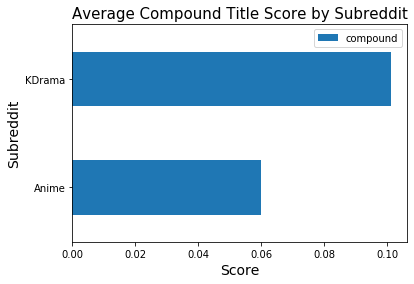

In [24]:
sentiment_df.groupby('subreddit').mean()[['compound']].plot(kind = 'barh')
plt.title('Average Compound Title Score by Subreddit', fontsize = 15)
plt.xlabel('Score', fontsize = 14)
plt.ylabel('Subreddit', fontsize = 14);

>From this figure it's clear that KDrama posts tend to have more positive sentiment that Anime posts. 

***
* Average Positive and Negative Score by Subreddit

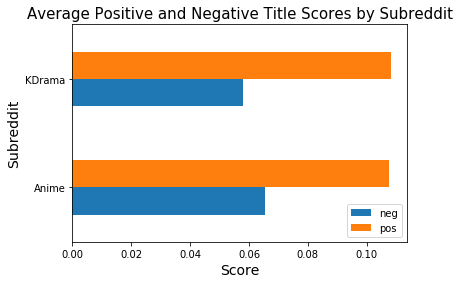

In [25]:
sentiment_df.groupby('subreddit').mean()[['neg', 'pos']].plot(kind = 'barh')
plt.title('Average Positive and Negative Title Scores by Subreddit', fontsize = 15)
plt.ylabel('Subreddit', fontsize = 14)
plt.xlabel('Score', fontsize = 14);

> This figure makes it very clear that on average, positive posts were significantly more positive than negative posts were negatives for both subreddits.

***
* Distribution of Compound Scores by Subreddit

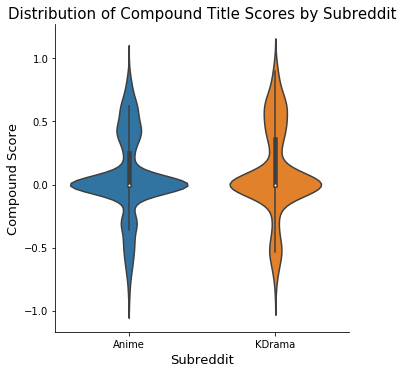

In [26]:
sns.catplot(y = 'compound',
            x = 'subreddit',
            data = sentiment_df, 
            kind = 'violin')
plt.title('Distribution of Compound Title Scores by Subreddit', fontsize = 15)
plt.xlabel('Subreddit', fontsize = 13)
plt.ylabel('Compound Score', fontsize = 13);

> This figure shows that both posts have more positive than negative posts. 
It also shows that there are more neutral anime posts that KDrama posts. 

In [27]:
cv = CountVectorizer(stop_words = 'english', max_df=.9)
tf = TfidfVectorizer(stop_words = 'english', max_df=.9)

In [28]:
#Fit dataframe to corpus
cv.fit(sentiment_df['title'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.9, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [29]:
# fit tfidf vectorizer to corpus
tf.fit(sentiment_df['title'])

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.9, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [30]:
#trasform title
title_words_cv = cv.transform(sentiment_df['title'])

In [31]:
# Convert title into a DataFrame using CountVectorizer
title_df_cv = pd.DataFrame(title_words_cv.toarray(),
                         columns = cv.get_feature_names())
title_df_cv.head()

,00,01,02,03,04,05,05172019,06,07,0706,...,사랑하니까,세상,썸탈,아름다운,와이키키,으라차차,처음이라서,첫사랑은,터지는,트리플썸
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
#Finding top 20 CountVectorized words
top_10_cv =title_df_cv.sum().sort_values(ascending = False).head(10)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text yticklabel objects>)

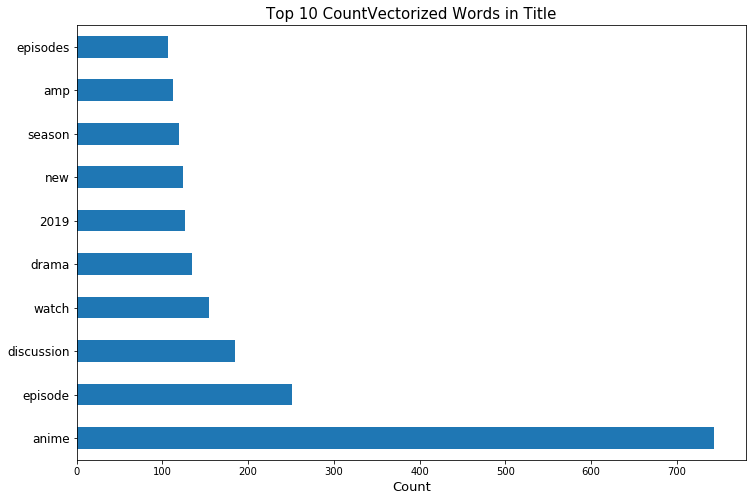

In [38]:
plt.figure(figsize=(12,8))
top_10_cv.plot(kind = 'barh')

plt.title('Top 10 CountVectorized Words in Title', fontsize = 15)
plt.xlabel('Count', fontsize = 13)
plt.yticks(fontsize = 12);

In [34]:
#transform title strings into columns using TFIDFVectorizer
title_words_tf = tf.transform(sentiment_df['title'])

In [35]:
# Convert title into a DataFrame using TFIDFVectorizer
title_df_tf = pd.DataFrame(title_words_tf.toarray(),
                         columns = tf.get_feature_names())
title_df_tf.head()

,00,01,02,03,04,05,05172019,06,07,0706,...,사랑하니까,세상,썸탈,아름다운,와이키키,으라차차,처음이라서,첫사랑은,터지는,트리플썸
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.452437,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
top_10_tf = title_df_tf.sum().sort_values(ascending = False).head(10)

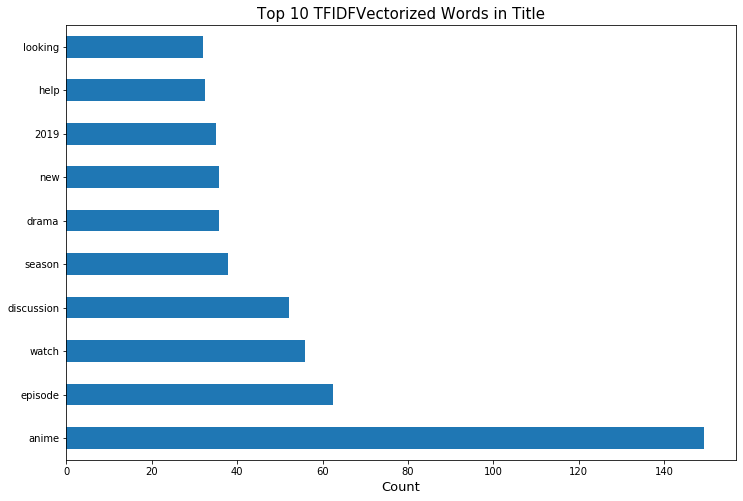

In [37]:
plt.figure(figsize=(12,8))
top_10_tf.plot(kind = 'barh')
plt.title('Top 10 TFIDFVectorized Words in Title', fontsize = 15)
plt.xlabel('Count', fontsize = 13);